## Scatter Plots 散點圖

## ``plot`` Versus ``scatter``: A Note on Efficiency 對比：性能提醒

> Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

除了上面說的`plt.plot`和`plt.scatter`對於每個散點不同屬性的支持不同之外，還有別的因素影響對這兩個函數的選擇嗎？對於小的數據集來說，兩者並無差別，當數據集增長到幾千個點時，`plt.plot`會明顯比`plt.scatter`的性能要高。造成這個差異的原因是`plt.scatter`支持每個點使用不同的大小和顏色，因此渲染每個點時需要完成更多額外的工作。而`plt.plot`來說，每個點都是簡單的複制另一個點產生，因此對於整個數據集來說，確定每個點的展示屬性的工作僅需要進行一次即可。對於很大的數據集來說，這個差異會導致兩者性能的巨大區別，因此，對於大數據集應該優先使用`plt.plot`函數。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('seaborn-whitegrid')

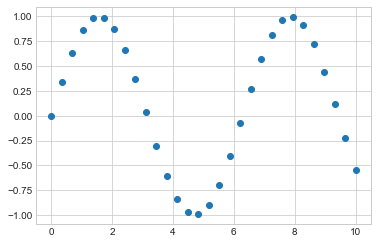

In [2]:
fig = plt.figure()  # Blank figure
ax = plt.axes()
x = np.linspace(0, 10, 30)  #密度 1000

plt.scatter(x, np.sin(x), marker='o');

> The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

`plt.scatter`和`plt.plot`的主要區別在於，`plt.scatter`可以針對每個點設置不同屬性（大小、填充顏色、邊緣顏色等），還可以通過數據集合對這些屬性進行設置。

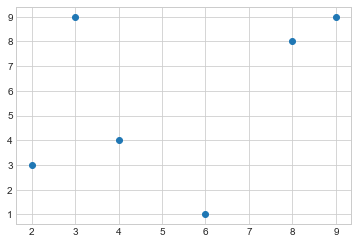

In [3]:
import matplotlib.pyplot as plt

plt.scatter([2,4,8,3,6,9], [3,4,8,9,1,9])  
plt.show()

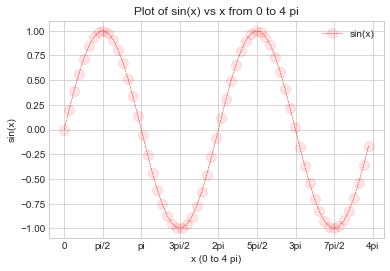

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0, 4 * np.pi, 0.2)
y = np.sin(x)


plt.plot(x, y,
    linewidth=0.5, linestyle='--', color='r', marker='o', markersize=10,markerfacecolor=(1, 0, 0, 0.1))

#######
plt.title('Plot of sin(x) vs x from 0 to 4 pi')
plt.xlabel('x (0 to 4 pi)')
plt.ylabel('sin(x)')
plt.legend(['sin(x)']) # list containing one string
#######

plt.xticks(np.arange(0, 4*np.pi + np.pi/2, np.pi/2),
           ['0','pi/2','pi','3pi/2','2pi','5pi/2','3pi','7pi/2','4pi'])
plt.grid(True)
plt.show()

## Legend for Size of Points 散點大小

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_2781/707225451.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


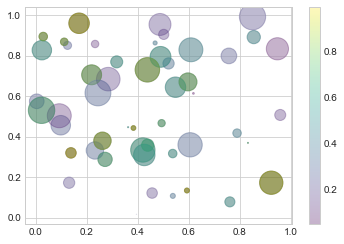

In [5]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2
colors = np.random.rand(N)

plt.scatter(x, y, s=area, c=colors, alpha=0.5)   #White/Black
plt.scatter(x, y, s=area, c=colors, alpha=0.3, cmap='viridis')   #color
plt.colorbar();
plt.show()

> We might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

當我們使用Scikit-learn中的鳶尾花數據集，裡面的每個樣本都是三種鳶尾花中的其中一種，並帶有仔細測量的花瓣和花萼的尺寸數據：圖中的(x, y)位置代表每個樣本的花萼的長度和寬度，散點的大小代表每個樣本的花瓣的寬度，而散點的顏色代表一種特定的鳶尾花類型。如上圖的多種顏色和多種屬性的散點圖對於我們分析和展示數據集時都非常有幫助。

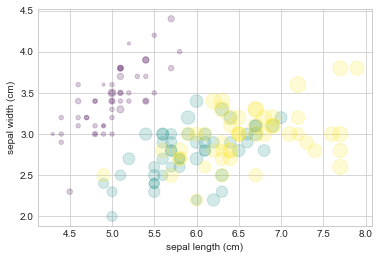

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1],alpha=0.2,
           s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

> Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

加州城市人口的散點圖，我們使用散點的大小表現該城市的面積，散點的顏色來表現城市的人口數量（自然對數值）。我們希望使用一個圖例來指明散點尺寸的比例，同時用一個顏色條來說明人口數量，我們可以通過自定義繪製一些標籤數據來實現尺寸圖例：

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_2781/3159074247.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='log$_{10}$(population)')


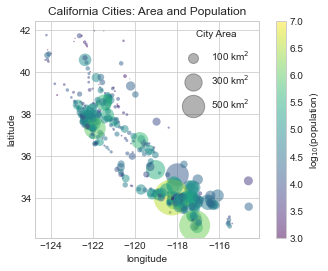

In [7]:
import pandas as pd
cities = pd.read_csv('input/plt-california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 繪製散點圖，使用尺寸代表面積，顏色代表人口，不帶標籤
plt.scatter(lon, lat, label=None,c=np.log10(population), cmap='viridis',s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 使用空列表繪製圖例中的散點，使用不同面積和標籤，帶透明度
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## Multivariate Analysis 多變量分析

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

data = pd.read_csv('input/pd-med-insurance.csv')
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

* The Expenses of Smokers in all regions ranges from 20 to 60k
* Whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
* The Lesser range of Expense is for lesser age people and vice versa.

In [9]:
data['children'] = data['children'].replace((4, 5), (3, 3))
px.scatter(data,x="expenses",y="age",
           facet_row="children",facet_col="region",
           color="smoker",trendline="ols")

* We can clearly see that there is a increasing pattern for BMI as well.
* For smoker with less BMI: Expense is around 20k
* For Smokers with High BMI: Expense is around 50K
* For Non Smokers BMI is not a Huge Factor, The Expense range from 5k to 10k

In [10]:
px.scatter(data,x="expenses",y="bmi", facet_row="children",
           facet_col="region", color="smoker",trendline="ols")

In [11]:
# A Bubble Chart to Represent the relation of Expense with BMI, Age, smoking
# only for the North West Region
px.scatter(data,x="expenses",y="bmi",
           size="age",color="smoker",hover_name="expenses", size_max=15)

## Example iris

In [12]:
import seaborn as sns
%matplotlib inline

sns.set()
new_iris = sns.load_dataset('input/iris')
new_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

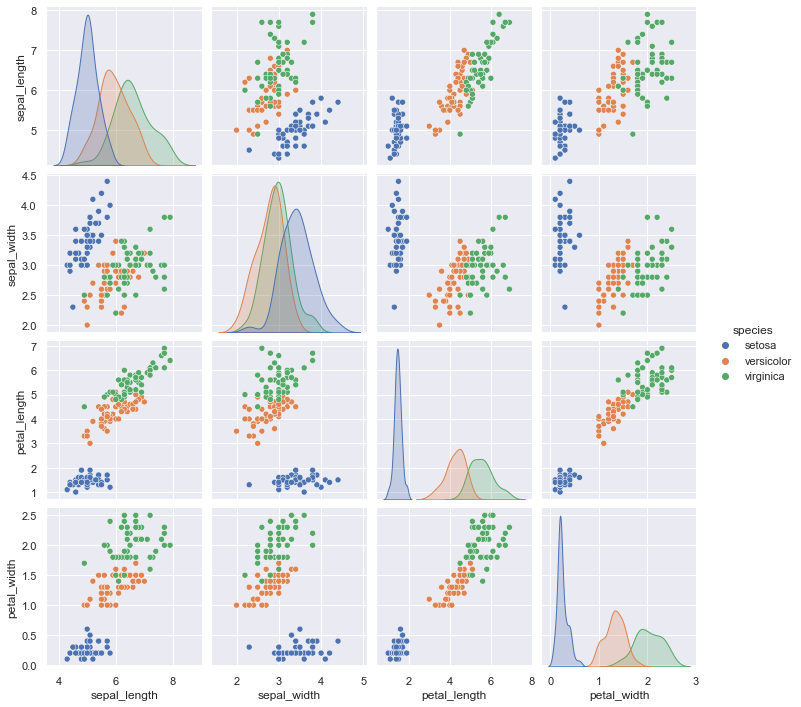

In [13]:
sns.pairplot(new_iris,hue="species",height=2.5)
#sns.pairplot(new_iris,hue="species",height=2.5,palette="Set2",diag_kind="kde")
plt.show()

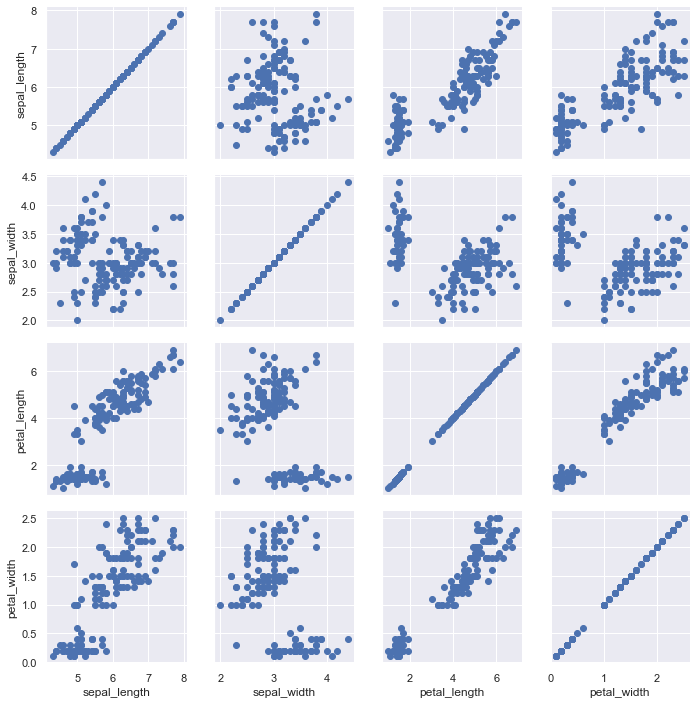

In [14]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map(plt.scatter)
plt.show()

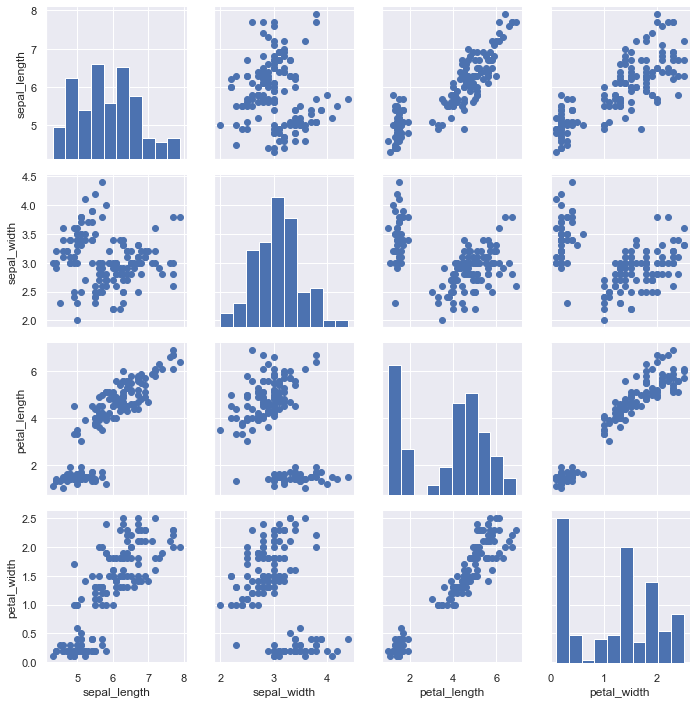

In [15]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()

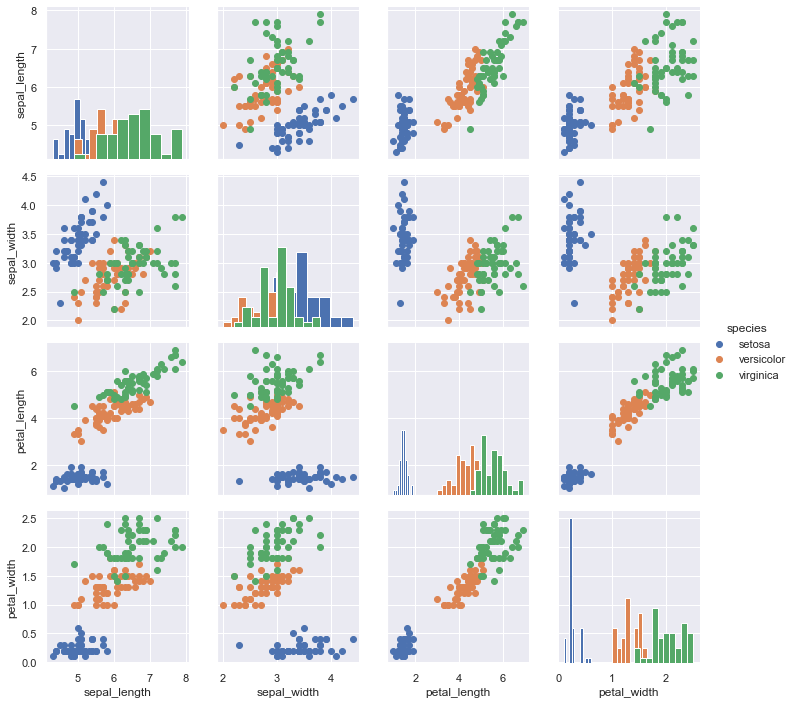

In [16]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris,hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

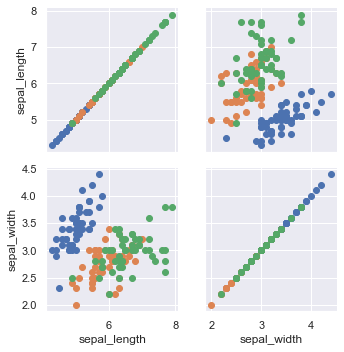

In [17]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris,vars=["sepal_length","sepal_width"],hue="species")
g.map(plt.scatter)
plt.show()

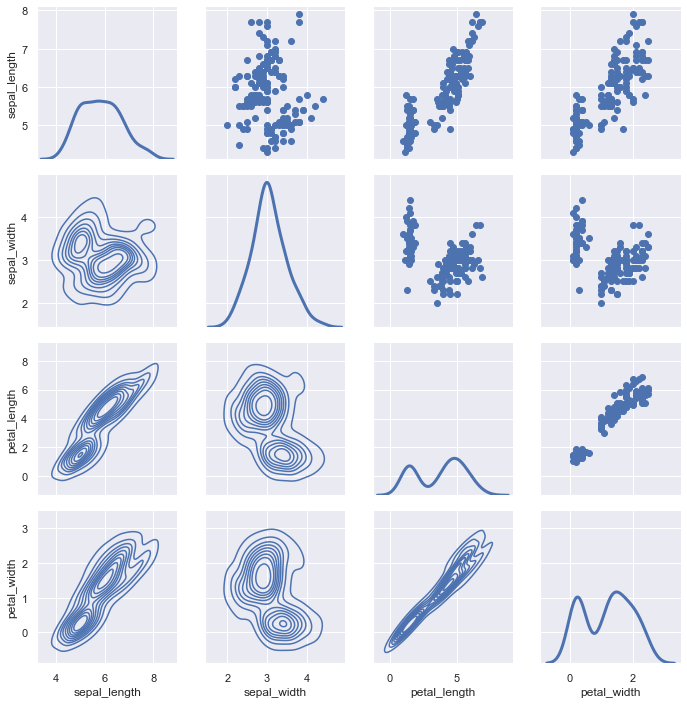

In [18]:
iris= sns.load_dataset("iris")
g=sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,lw=3,legend=False)
plt.show()

<!--NAVIGATION-->
< [简单的折线图](04.01-Simple-Line-Plots.ipynb) | [目录](Index.ipynb) | [误差可视化](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
